In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

In [75]:
data = pd.read_excel('dataset.xlsx')

In [76]:
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

# **1.Exploratory Data Analysis**

## **Objectif** :

#### **Analyse de Forme** :

- **variable target** : SARS-Cov-2 exam result
- **ligne et colonnes** : (5644, 111)
- **type de variables** : qualitatives: 70, quantitatives: 41
- **Analyse des valeurs manquantes** :
  - Beaucoup de NaN (moitié des variables > 90% de NaN)
  - 2 groupes de données :
    - 76% -> Test viral
    - 89% -> Taux sanguins

#### **Analyse de Fond** :

- **visualisation de la target** :
  - 10% de positifs (558 / 5000)
- **Signification des variables** :
  - variables continues standardisées, skewed (asymétriques), test sanguin
  - age quantile : difficile d'interpreter ce graphique, clairement ces données ont été traitées, on pourrait penser 0-5, mais cela pourrait aussi être une transformation mathématique. On peut ne peut pas savoir car la personne qui a mit ce dataset ne le précise nul part. Mais ça n'est pas très important
  - variable qualitative: binaire (0, 1), viral, Rhinovirus qui semble très élevé
- **Relation Variables / Target** :
  - target / blood : les taux de Monocytes, Platelets, Leukocytes, semblent liés au covid-19 -> hypothèse à tester
  - target / age : les individus de faible âge sont très peu contaminés ? -> attention on ne connaît pas l'âge, et on ne sait pas de quand date le dataset (s'il s'agit des enfants on sait que les enfants sont touchés autant que les adultes). En revanche cette variable pourra être intéressante pour la comparer avec les résultats de tests sanguins
  - target / viral : les doubles maladies sont très rares. Rhinovirus/Enterovirus positif - covid-19 négatif ? -> hypothèse à tester ? mais il est possible que la région ait subie une épidémie de ce virus. De plus on peut très bien avoir 2 virus en même temps. Tout ça n'a aucun lien avec le covid-19

---

## **Conclusions initiales**

- Beaucoup de données manquantes (au mieux on garde 20% du dataset)
- 2 groupes de données intéressantes (viral, sanguin)
- Presque pas de variable "discriminante" pour distinguer kes cas positifs/négatifs, ce qui nous permet de dire qu'il n'est pas vraiment approprié de vouloir prédire si un individu est atteint du Covid-19 en se basant sur ces simples tests sanguins. Mais c'est pas grave, il faut quand même poursuivre l'analyse pour essayer de voir ce qu'on peut apprendre. Rome ne s'est pas faites en un jour, et le Machine Learning ça ne peut pas transformer de l'eau en vin. Mais ça n'est pas une raison pour abandonner le projet. Et ça, c'est la chose la plus importante que vous devez retenir de cette vidéo : Un bon data scientist va jusqu'au bout de sa mission. Si en cours de route, on se rend compte que l'histoire n'est pas aussi simple qu'on pouvait l'espérer, alors il faut pouvoir le démontrer de façon robuste en allant jusqu'au bout des choses.
- Donc maintenant quand même quelque chose de positif : on a pu identifier des variables intéressantes qui sont susceptibles de jouer un rôle non négligeable (monocytes etc)

---

## **Analyse plus détaillée**

- ### **Relation Variables / Variables** :
  - blood_data / blood_data : certaines variables sont très corrélées -> +0.9 ( surveiller plus tard)
  - blood_data / age : très faible corrélation entre âge et taux sanguin
  - viral / viral : influenza rapid test donne de mauvais résultats, il faudra peut-être la laisser tomber
  - relation maladie / blood_data : Les taux sanguins entre malades et covid-19 sont différents
  - relation hospitalisation / est malade :
  - relation hospitalisation / blood : intéressant dans le cas où on voudrait prédire dans quel service un patient devrait aller

- **NaN analyse** : viral : 1350(92%/8%), blood : 600(87%/13%), both : 90%

### **Hypothèses nulles (H0)** :
- Les individus atteints du covid-19 ont des taux de Leukocytes, Monocytes, Platelets significativement différents
  - H0 = Les taux moyens sont ÉGAUX chez les individus positifs et négatifs -> hypothèse rejetée
- Les individus atteints d'une quelconque maladie ont des taux significativement différents

In [77]:
df = data.copy()

<AxesSubplot:ylabel='None'>

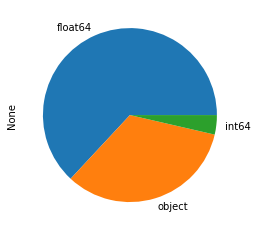

In [78]:
df.dtypes.value_counts().plot.pie()

<AxesSubplot:>

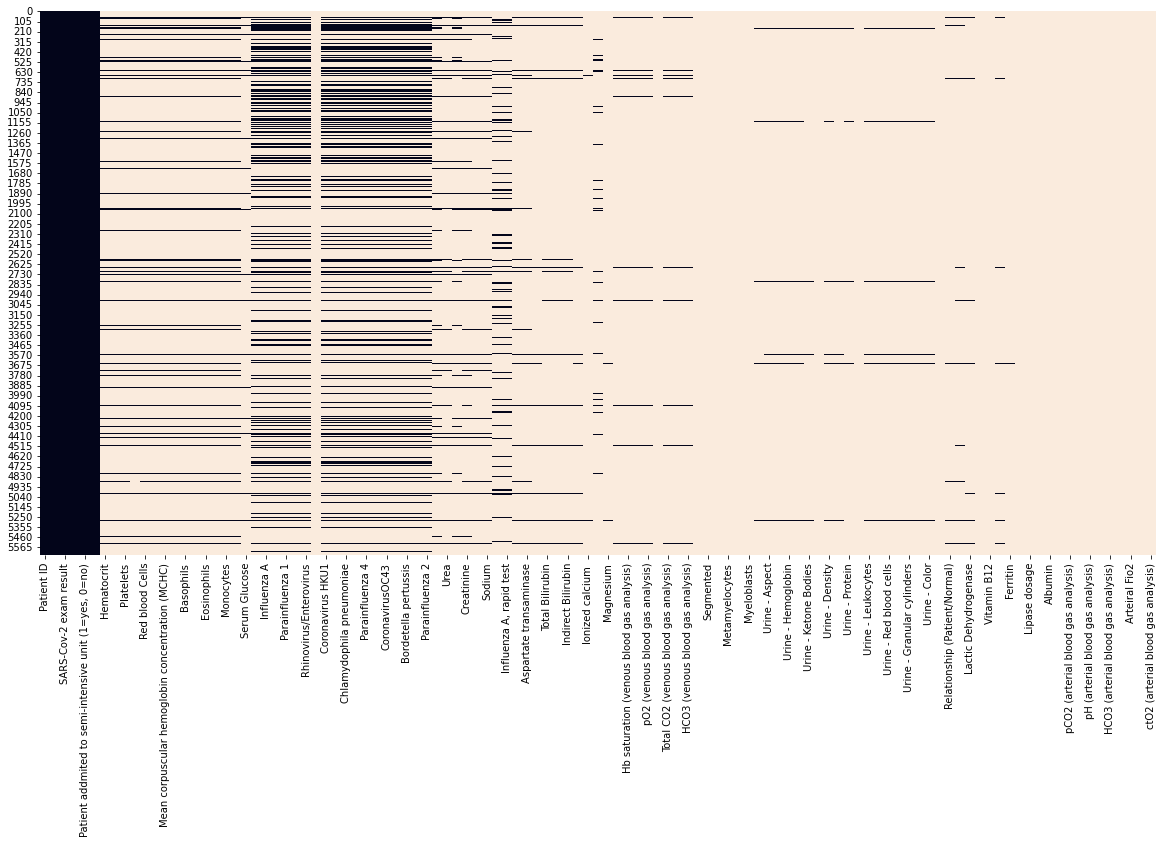

In [79]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [80]:
(df.isna().sum() / df.shape[0]).sort_values(ascending=True)

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

# Analyse du Fond

## 1. Visualisation initiale - Elimination des colonnes inutiles


In [81]:
df = df[df.columns[(df.isna().sum() / df.shape[0]) < 0.9]]

<AxesSubplot:>

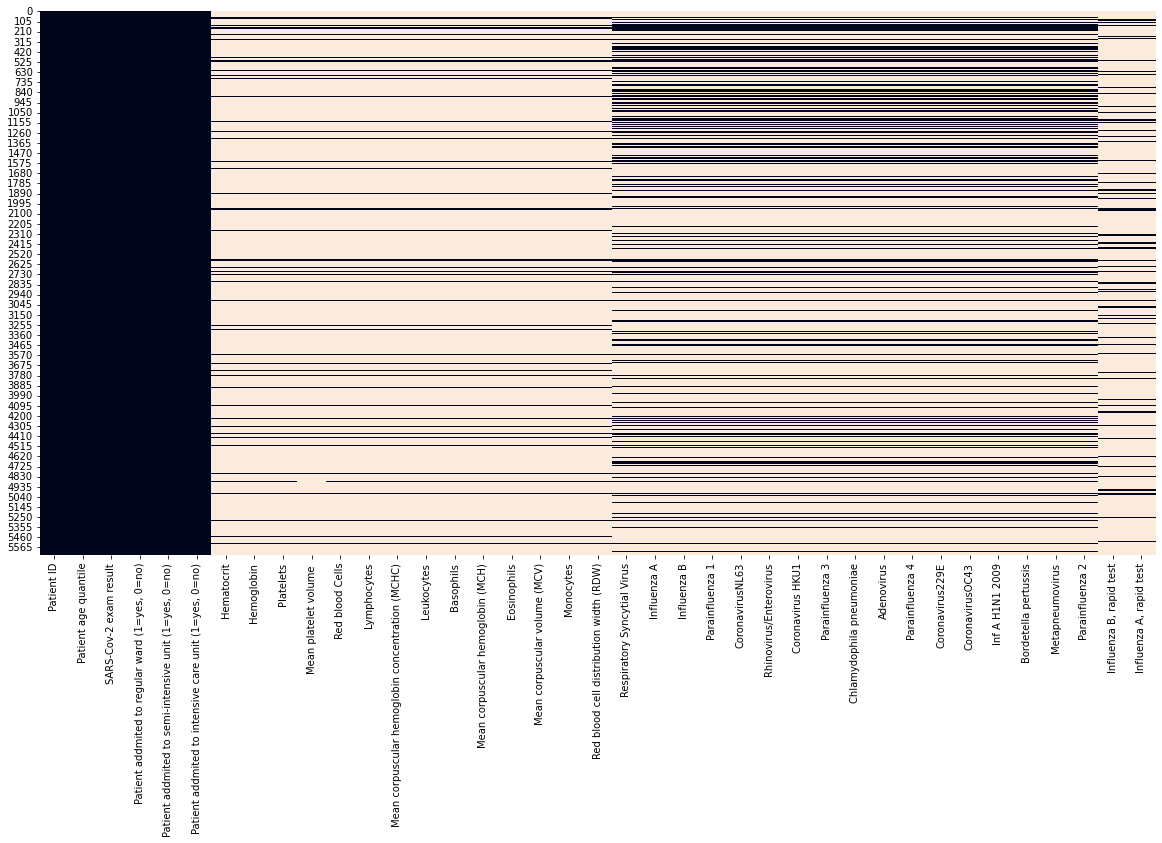

In [82]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [83]:
df = df.drop('Patient ID', axis=1)

In [84]:
df

Patient age quantile SARS-Cov-2 exam result  \
0                       13               negative   
1                       17               negative   
2                        8               negative   
3                        5               negative   
4                       15               negative   
...                    ...                    ...   
5639                     3               positive   
5640                    17               negative   
5641                     4               negative   
5642                    10               negative   
5643                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0            NaN        NaN                    NaN              NaN   
1      -0.022340  -0.517413               0.010677         0.102004   
2            NaN        NaN                    NaN              NaN   
3            NaN        NaN                    NaN              NaN   
4            NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5639         NaN        NaN                    NaN              NaN   
5640         NaN        NaN                    NaN              NaN   
5641         NaN        NaN                    NaN              NaN   
5642         NaN        NaN                    NaN              NaN   
5643    0.541564  -0.906829              -0.325903         0.578024   

      Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
0             NaN                                               NaN   
1        0.318366                          

## Examen de la colonne target


In [85]:
df['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

## Histogrames des variables continues


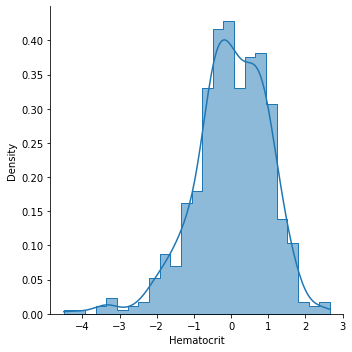

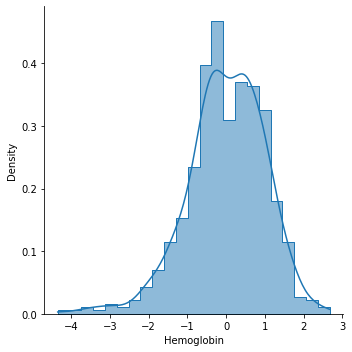

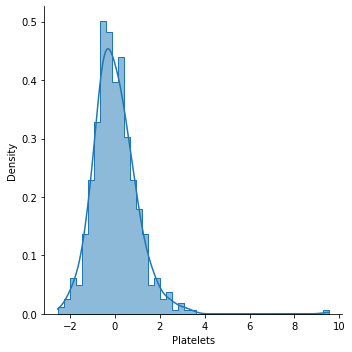

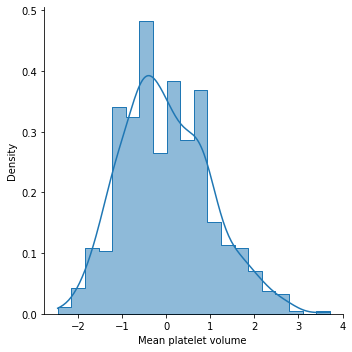

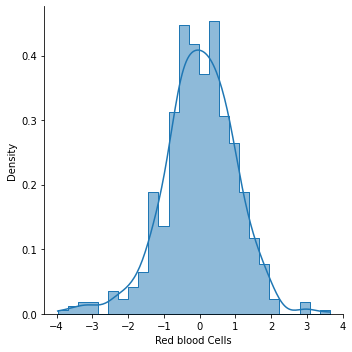

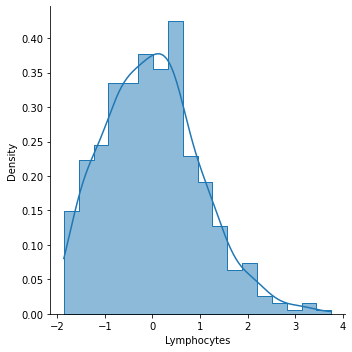

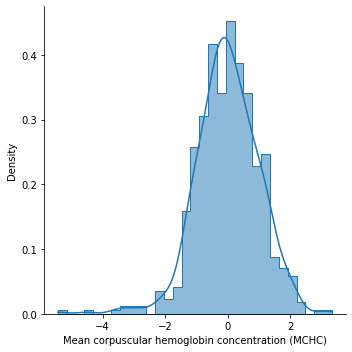

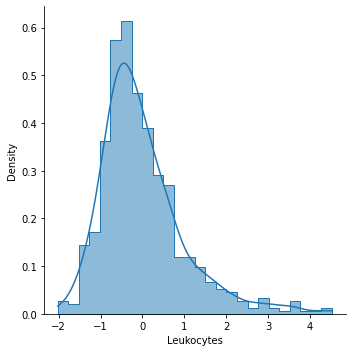

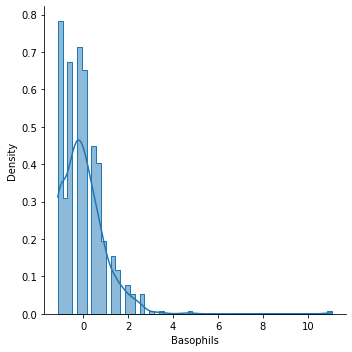

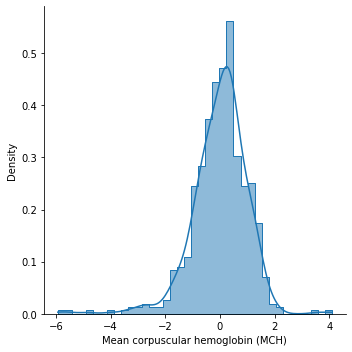

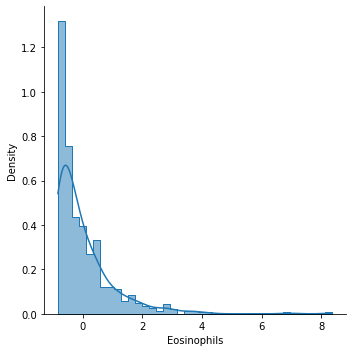

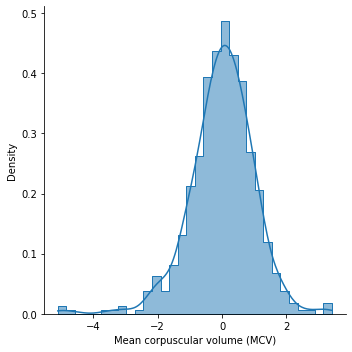

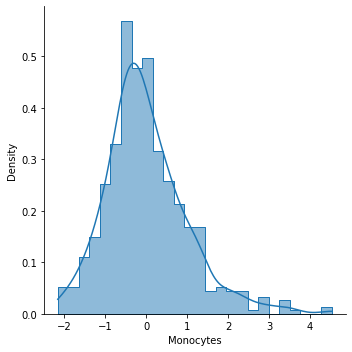

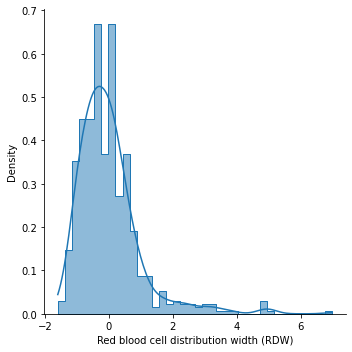

In [198]:
for col in df.select_dtypes('float'):
    sns.displot(df[col], kde=True, element='step', stat='density')

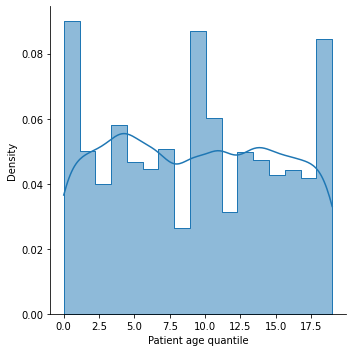

In [161]:
sns.displot(df['Patient age quantile'], kde=True, element='step', stat='density')

## Variables Qualitatives


In [88]:
df['SARS-Cov-2 exam result'].unique()

array(['negative', 'positive'], dtype=object)

In [99]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

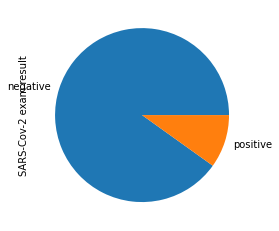

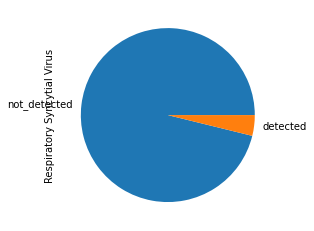

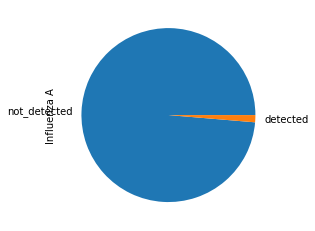

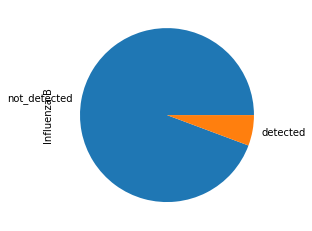

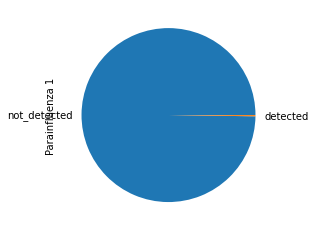

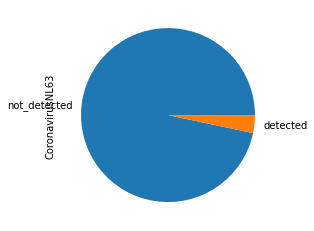

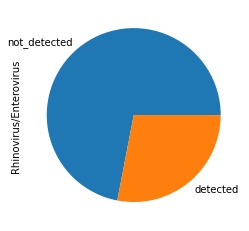

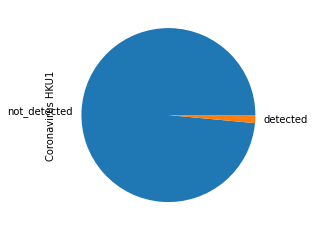

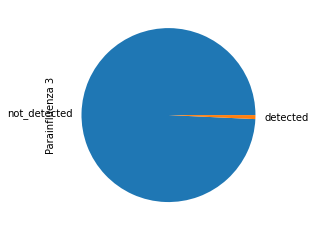

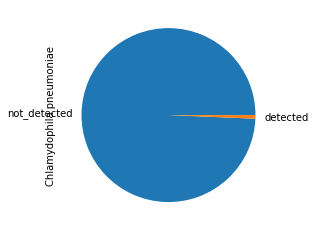

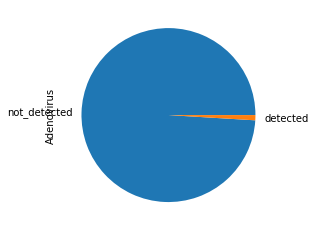

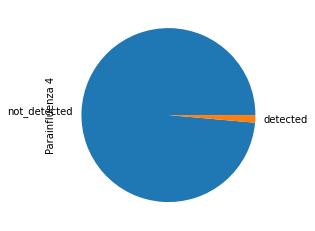

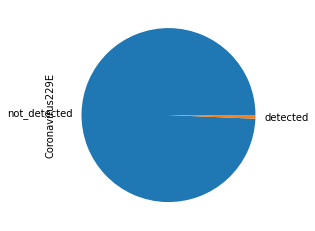

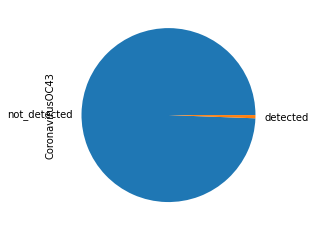

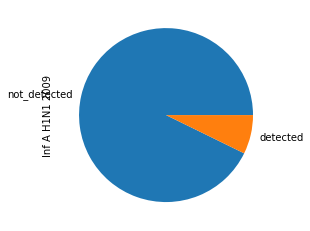

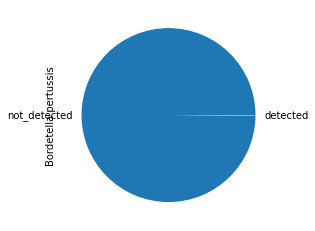

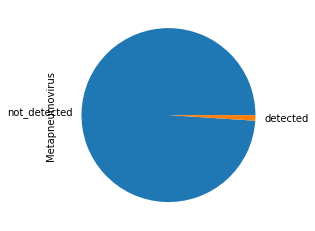

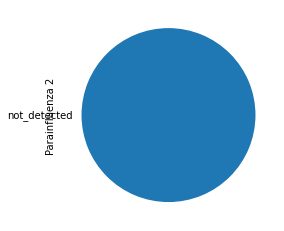

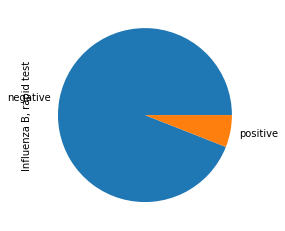

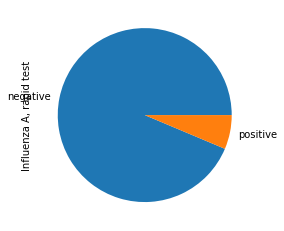

In [102]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

## Relation Variables / Target

### Création de sous-ensembles positifs et négatifs


In [128]:
positive_df = df[df['SARS-Cov-2 exam result'] == 'positive']
negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']

### Création de sous-ensembles Blood et viral


In [114]:
missing_rate = df.isna().sum() / df.shape[0]

In [124]:
blood_columns = df.columns[(missing_rate > 0.88) & (missing_rate < 0.9)]
viral_columns = df.columns[(missing_rate > 0.75) & (missing_rate < 0.88)]

### Target / Blood


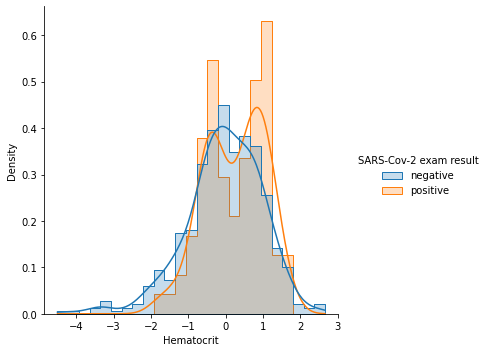

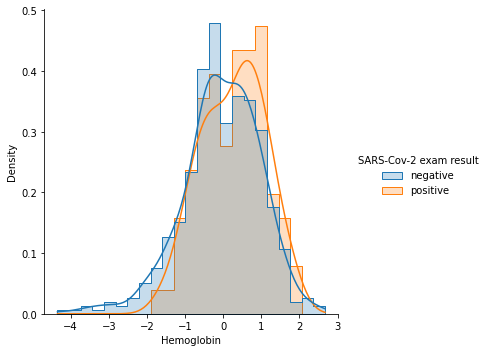

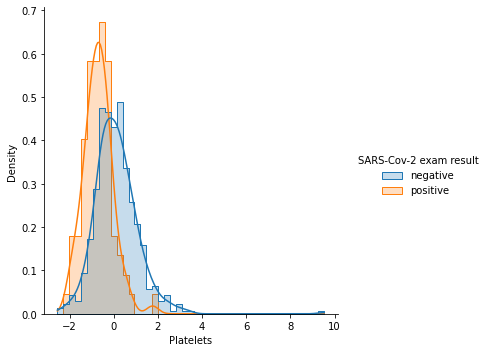

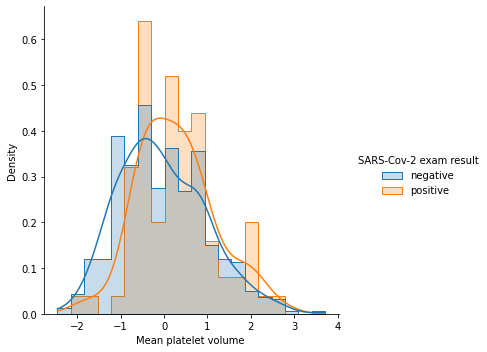

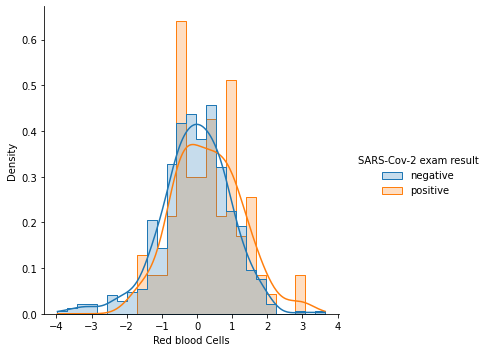

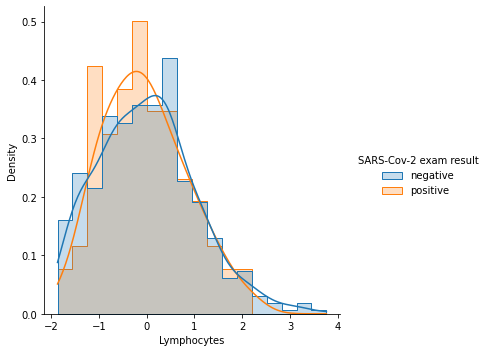

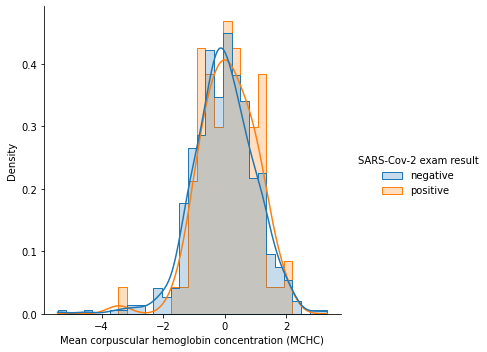

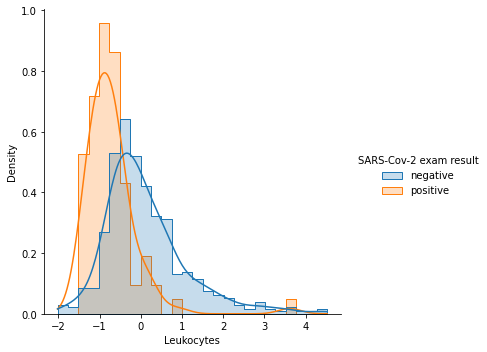

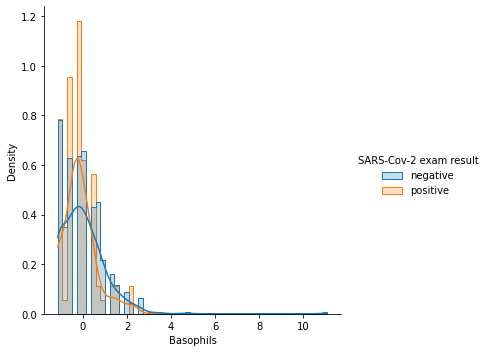

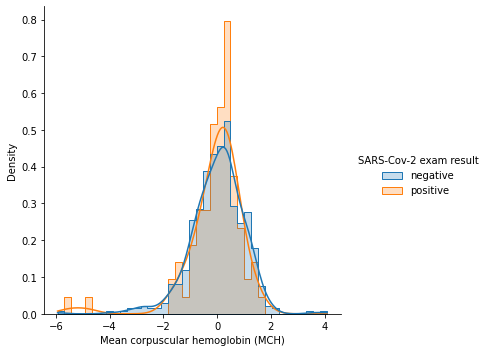

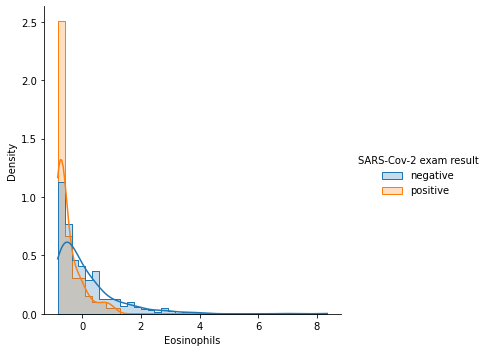

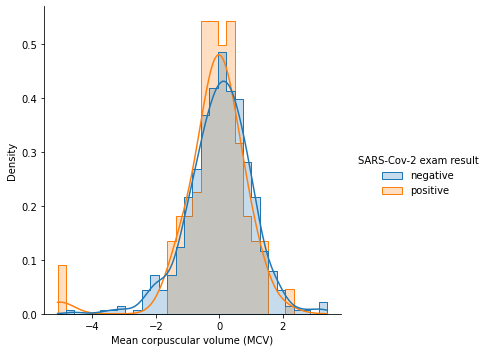

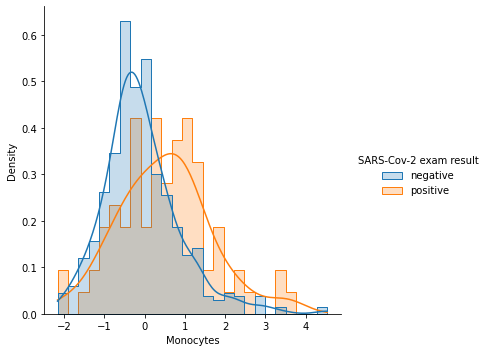

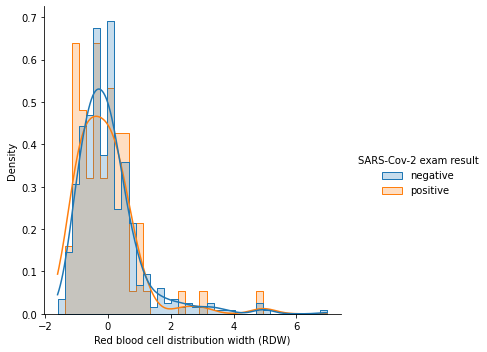

In [197]:
for col in blood_columns:
    sns.displot(df,
                x=col,
                hue='SARS-Cov-2 exam result',
                kind='hist',
                kde=True,
                element='step',
                stat='density',
                common_norm=False)


### Target / Age

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

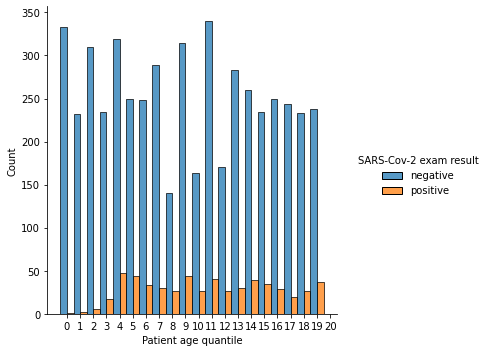

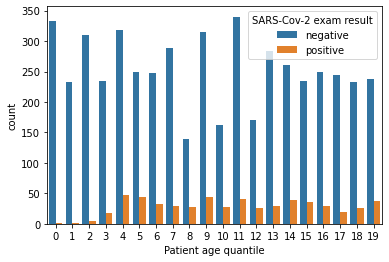

In [194]:
sns.displot(x='Patient age quantile',
            hue='SARS-Cov-2 exam result',
            data=df,
            multiple='dodge',
            discrete=True).set(xticks=range(0, 21))

plt.figure()
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data=df)


### Target / Viral

In [195]:
pd.crosstab(df['SARS-Cov-2 exam result'], df['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

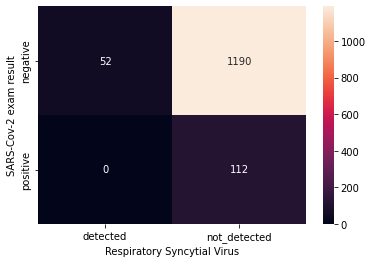

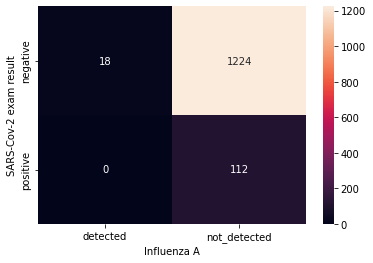

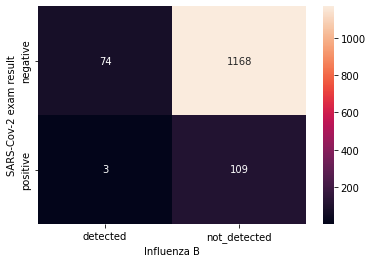

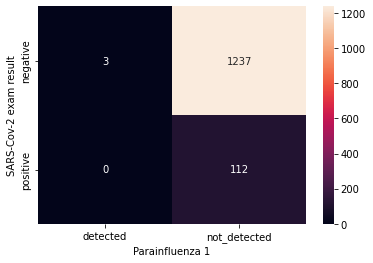

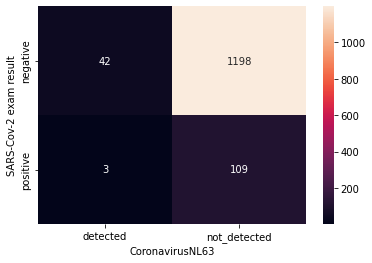

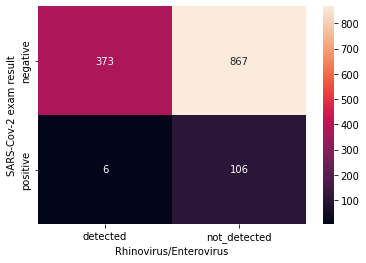

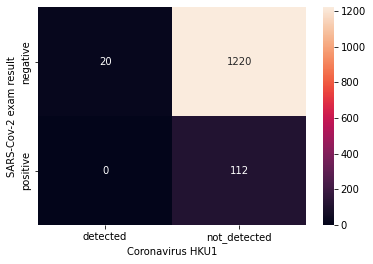

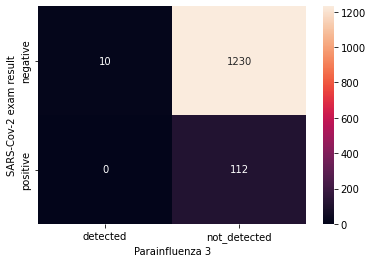

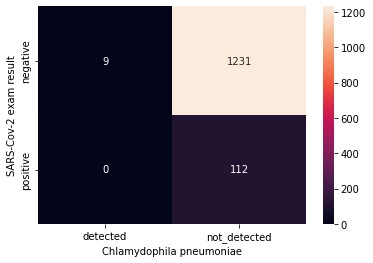

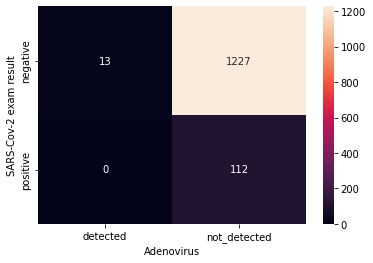

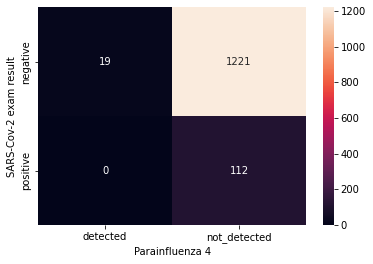

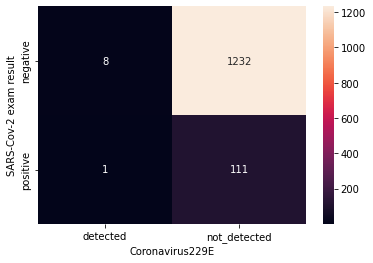

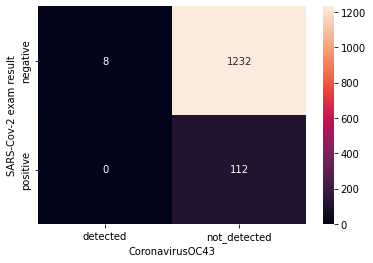

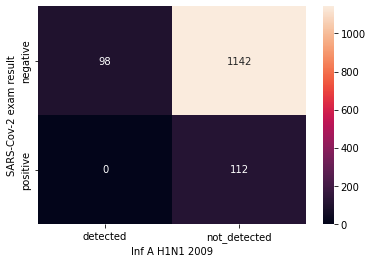

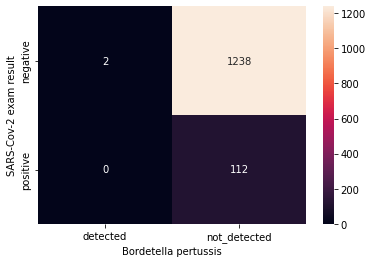

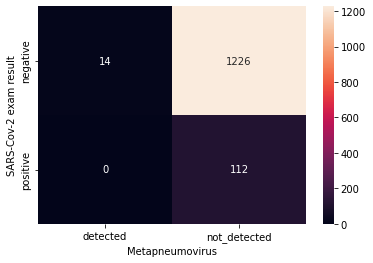

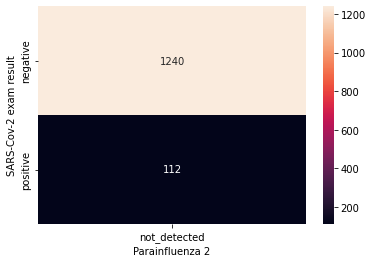

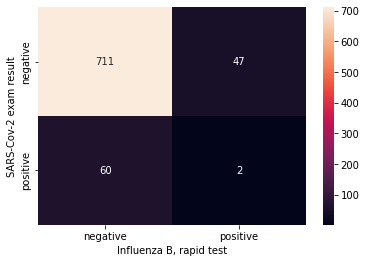

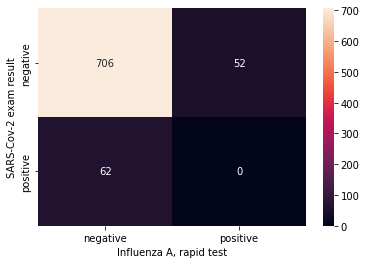

In [202]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot=True, fmt='d')

## **Analyse plus détaillée**

### **Relation Variables / Variables**

#### **Relations Taux Sanguin**

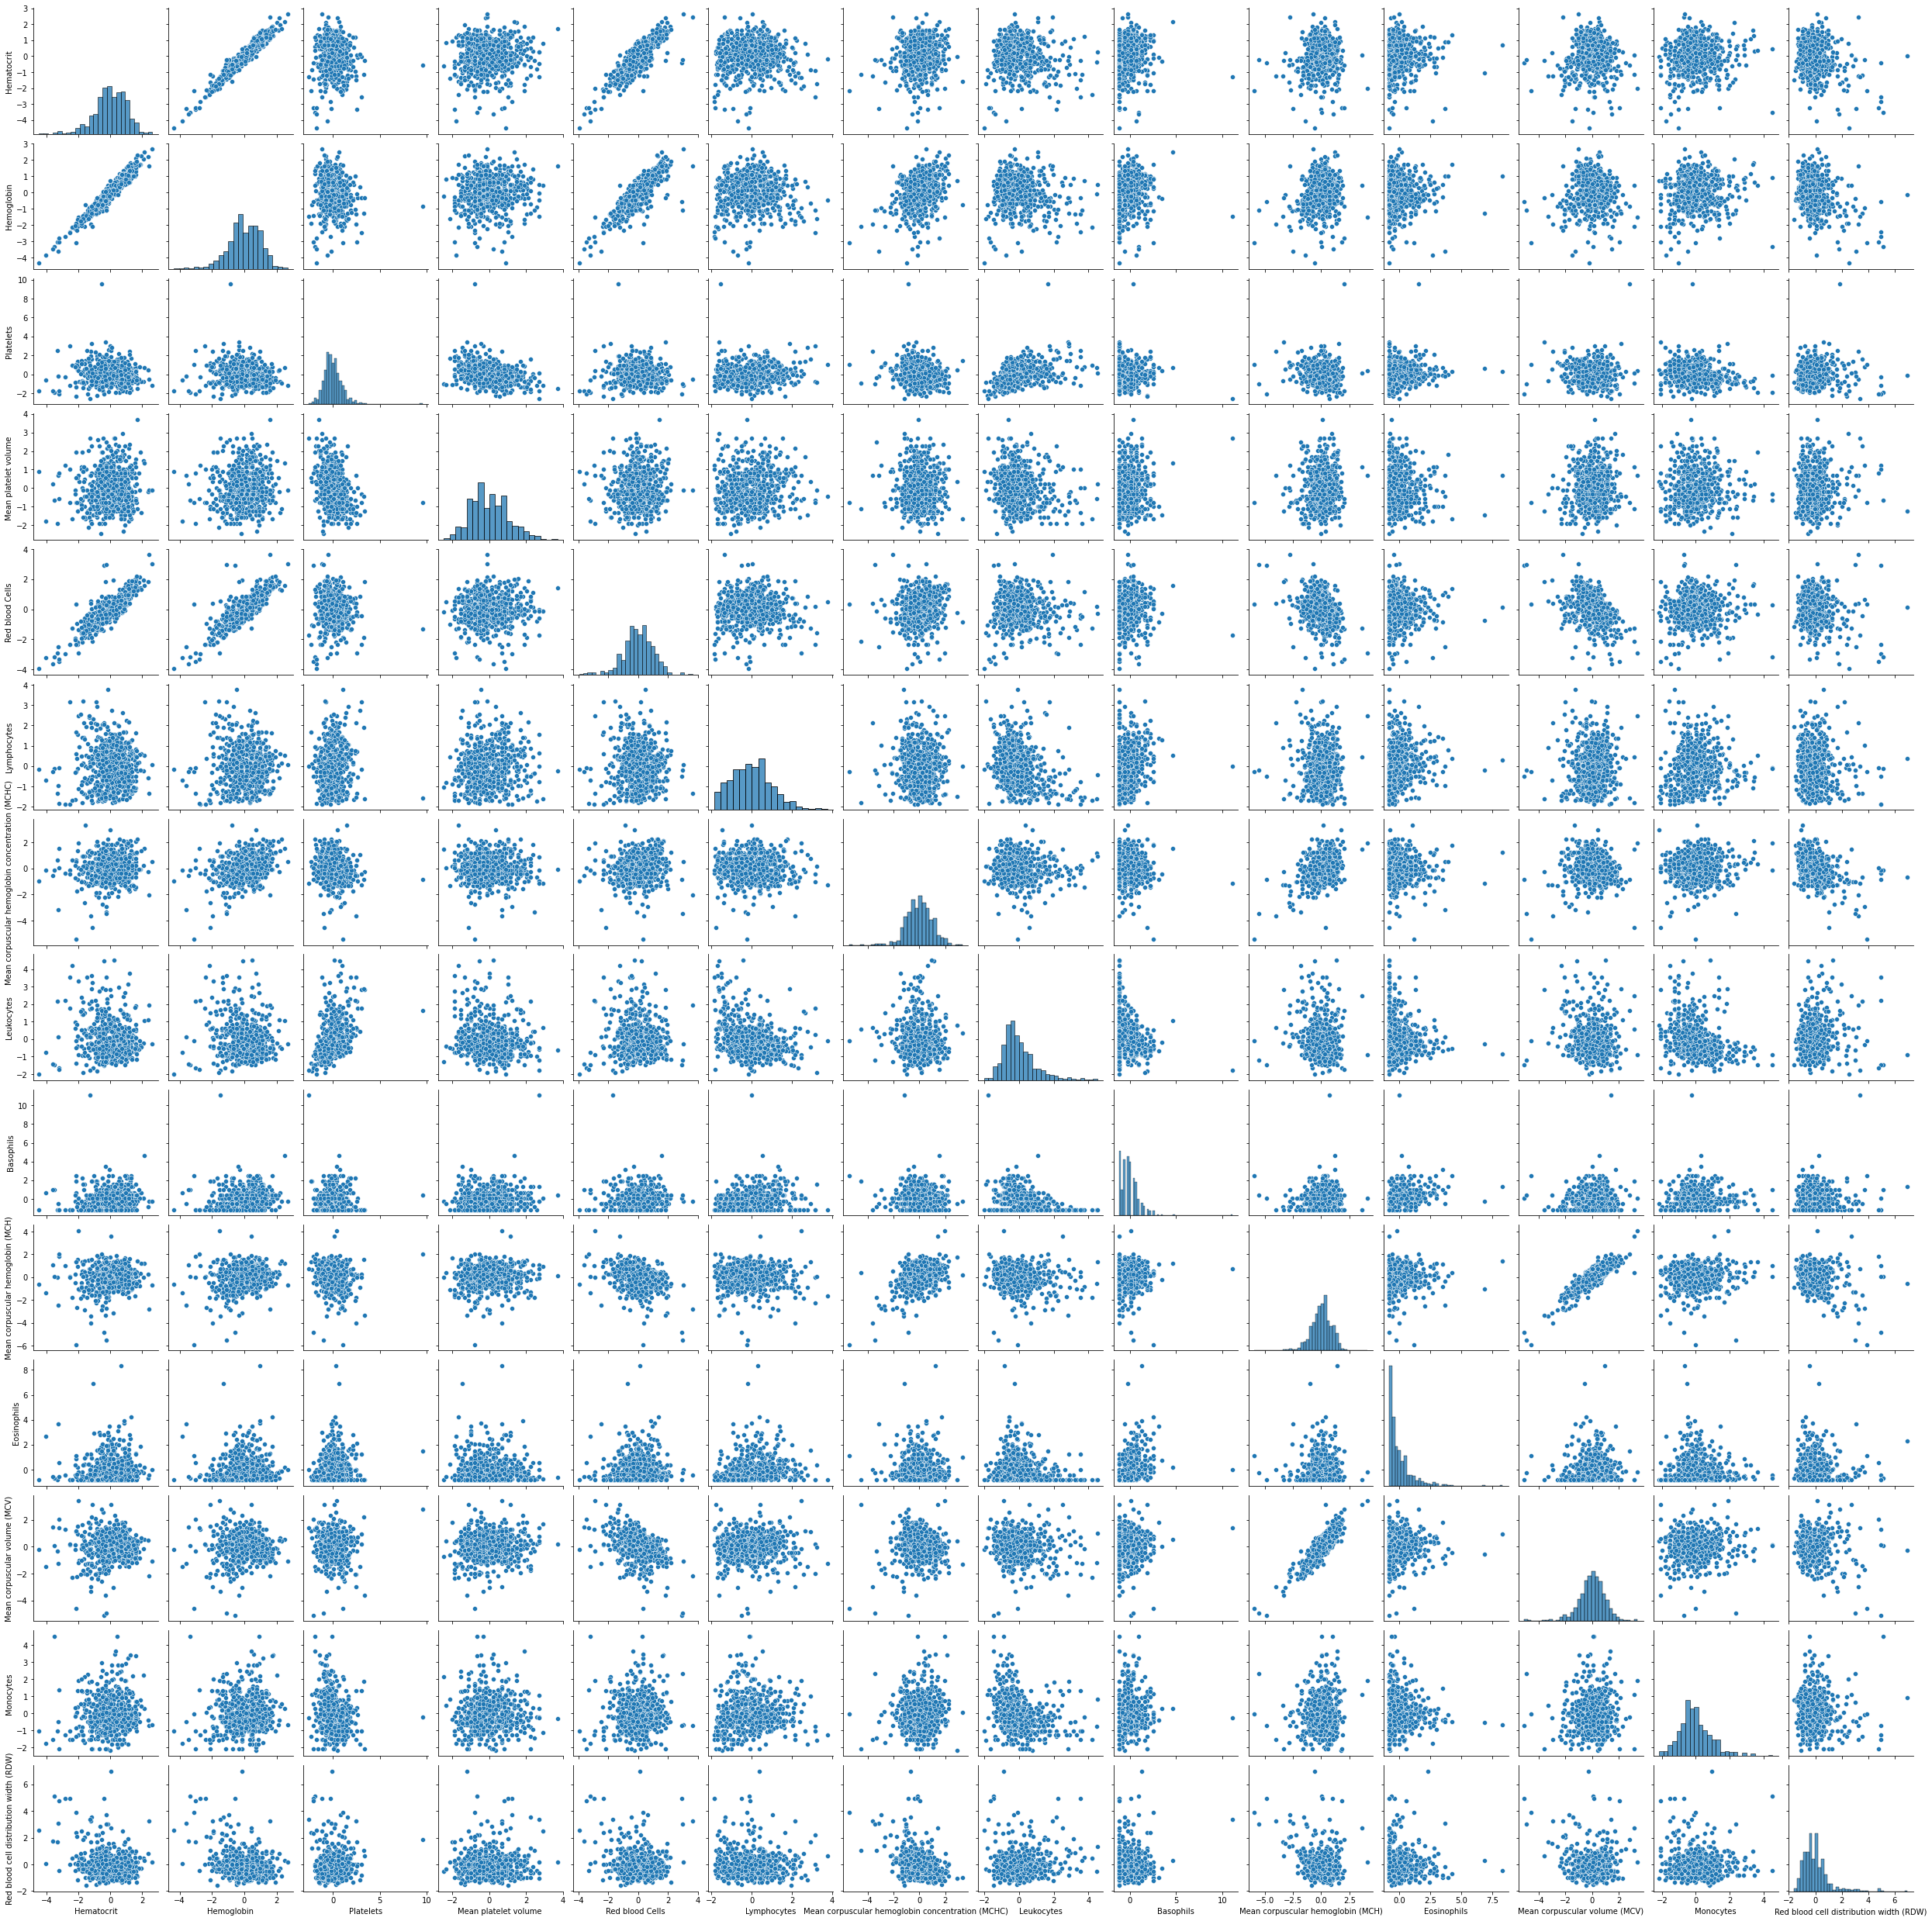

In [203]:
sns.pairplot(df[blood_columns])

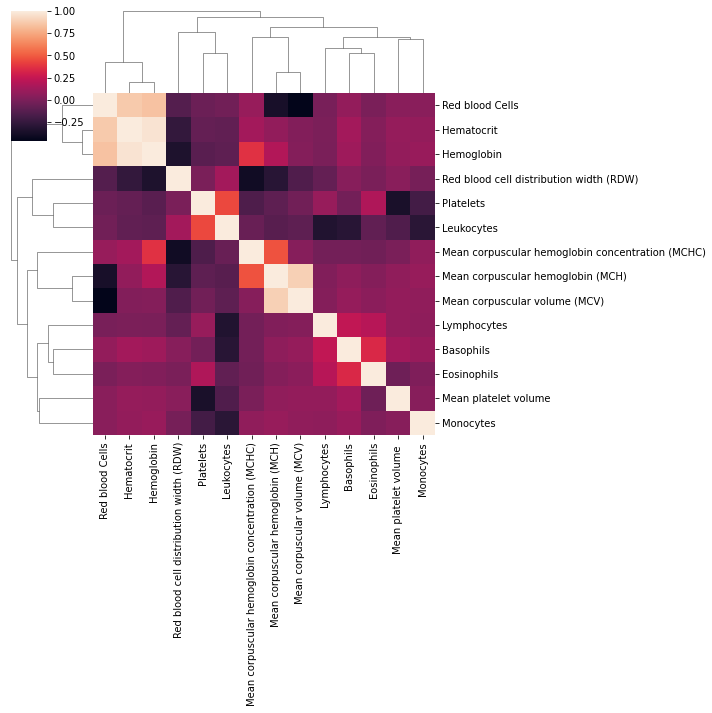

In [205]:
sns.clustermap(df[blood_columns].corr())

#### **Relations Age / Sang**

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_16268/264415228.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

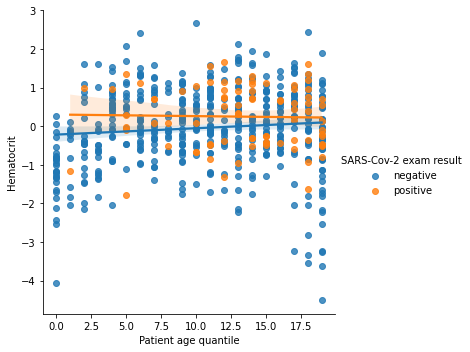

<Figure size 432x288 with 0 Axes>

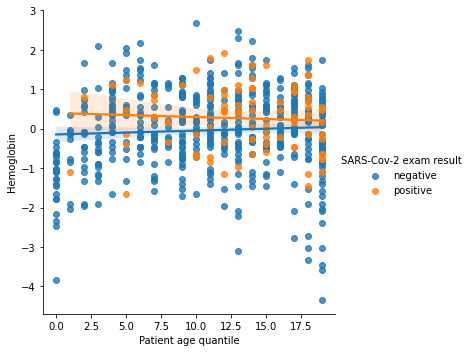

<Figure size 432x288 with 0 Axes>

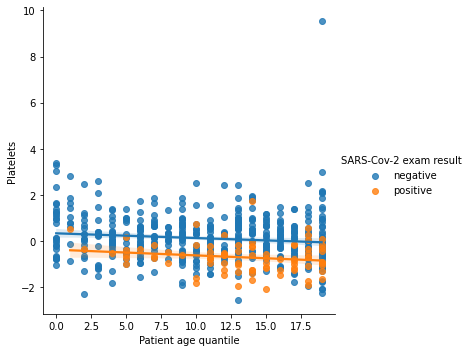

<Figure size 432x288 with 0 Axes>

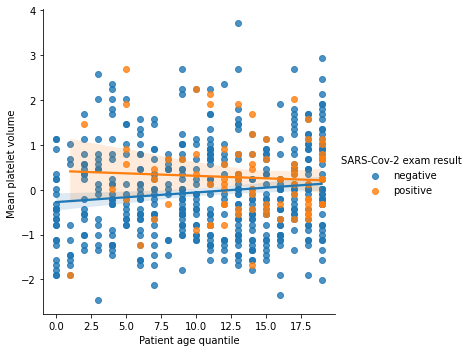

<Figure size 432x288 with 0 Axes>

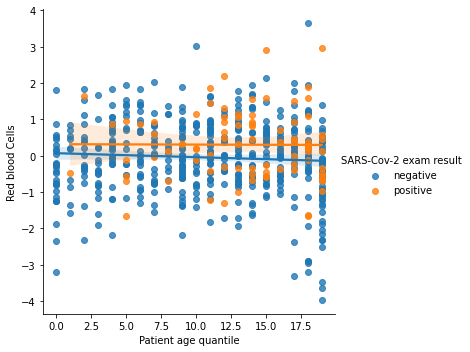

<Figure size 432x288 with 0 Axes>

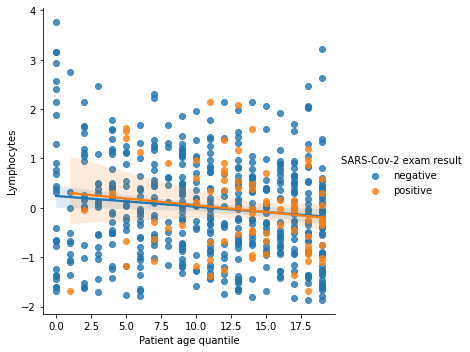

<Figure size 432x288 with 0 Axes>

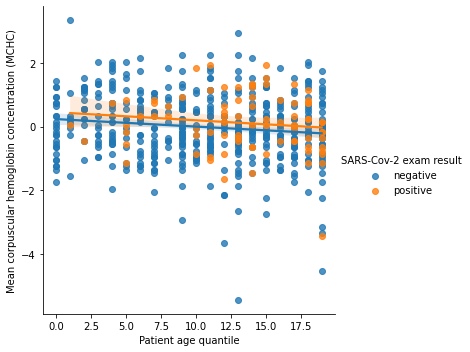

<Figure size 432x288 with 0 Axes>

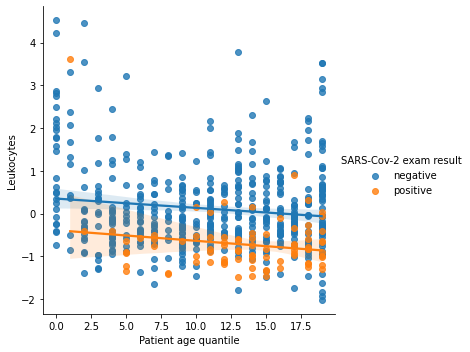

<Figure size 432x288 with 0 Axes>

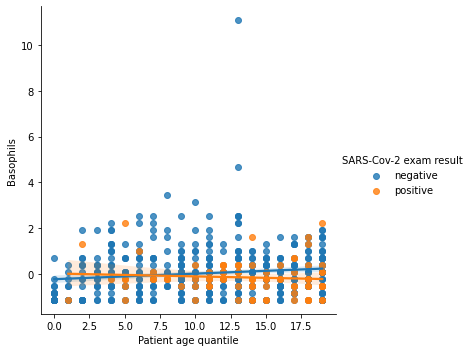

<Figure size 432x288 with 0 Axes>

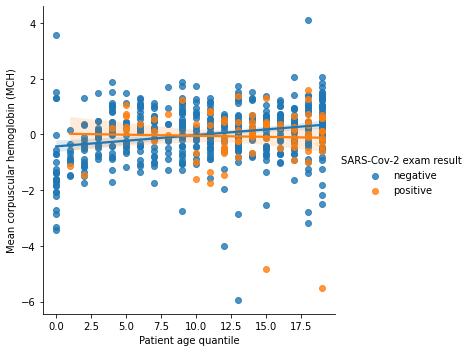

<Figure size 432x288 with 0 Axes>

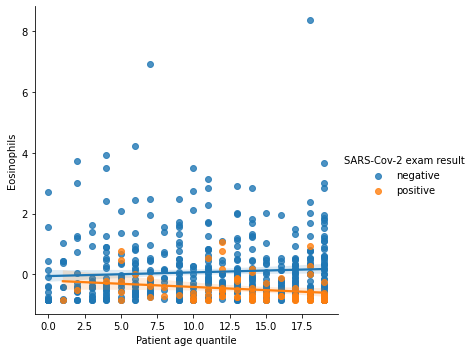

<Figure size 432x288 with 0 Axes>

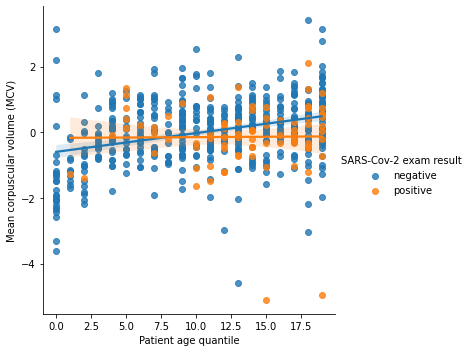

<Figure size 432x288 with 0 Axes>

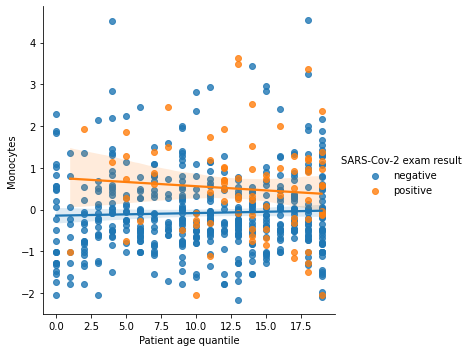

<Figure size 432x288 with 0 Axes>

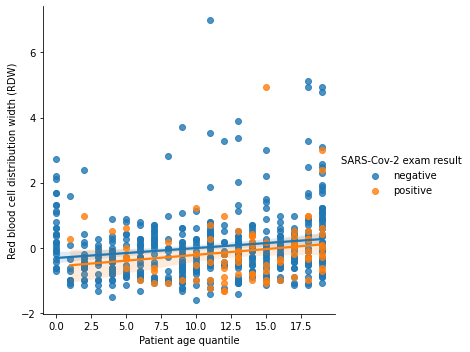

In [207]:
for col in blood_columns:
    plt.figure()
    sns.lmplot(x='Patient age quantile', y=col, hue='SARS-Cov-2 exam result', data=df)

In [213]:
df.corr()['Patient age quantile'].sort_values(ascending=False)

Patient age quantile                                     1.000000
Mean corpuscular volume (MCV)                            0.281655
Mean corpuscular hemoglobin (MCH)                        0.197394
Red blood cell distribution width (RDW)                  0.166429
Mean platelet volume                                     0.119449
Basophils                                                0.107525
Hematocrit                                               0.096808
Hemoglobin                                               0.060320
Monocytes                                                0.050962
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Eosinophils                                              0.022085
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Red blood Cells                                         -0.037510
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Lymphocyte

### **Relations Viral / Viral**

#### **Relations Influenza / Rapid test**

In [215]:
pd.crosstab(df['Influenza A'], df['Influenza A, rapid test'])


Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [216]:
pd.crosstab(df['Influenza B'], df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

### **Relations Viral / Sanguin**

#### **Création d'un nouvelle variable "est malade"**

In [223]:
df['est malade'] = np.sum(df[viral_columns[:-2]] == 'detected', axis=1) >= 1

In [224]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

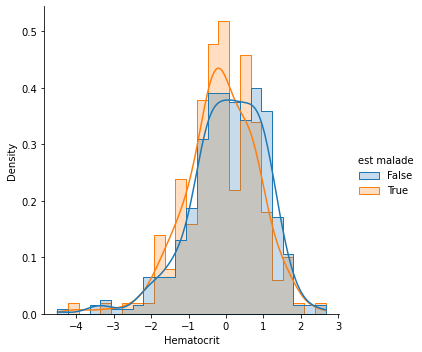

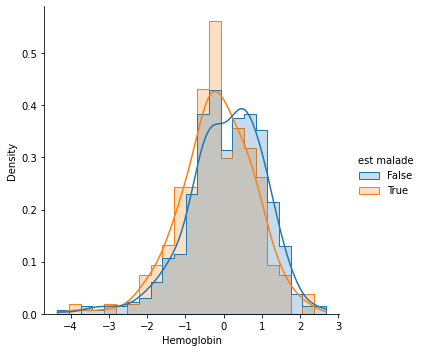

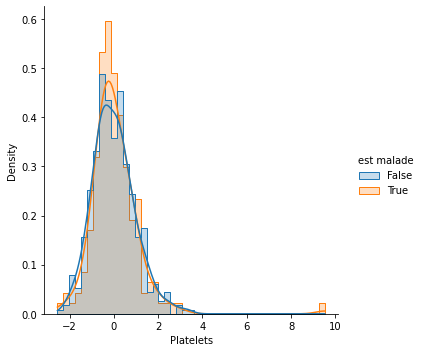

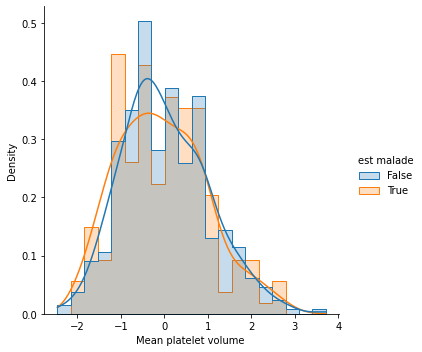

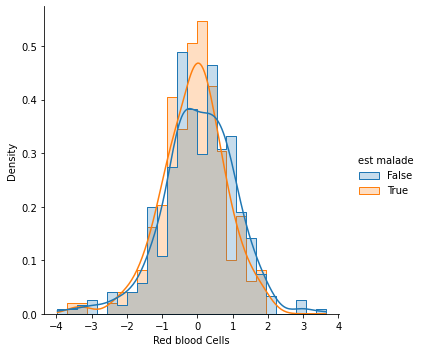

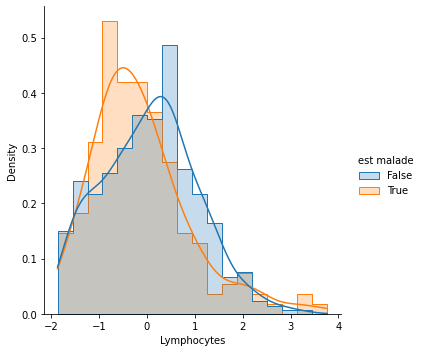

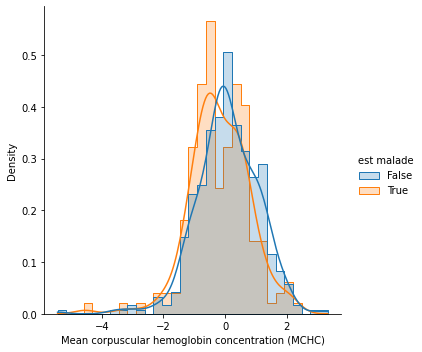

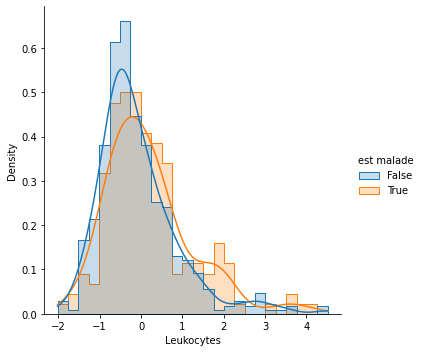

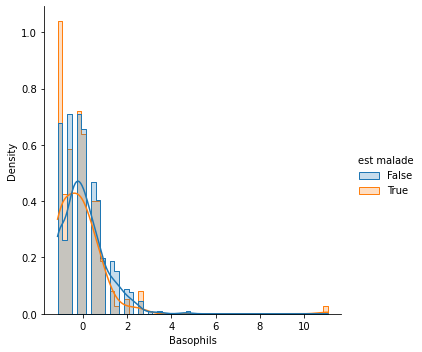

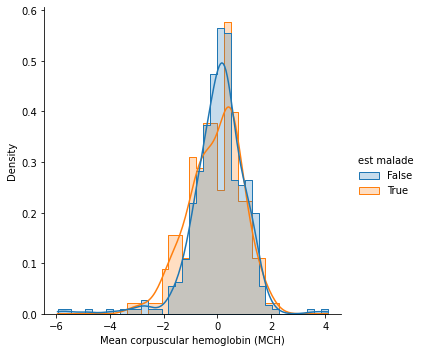

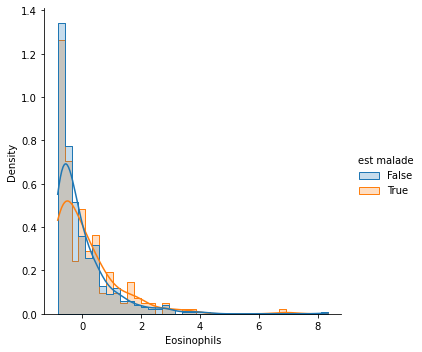

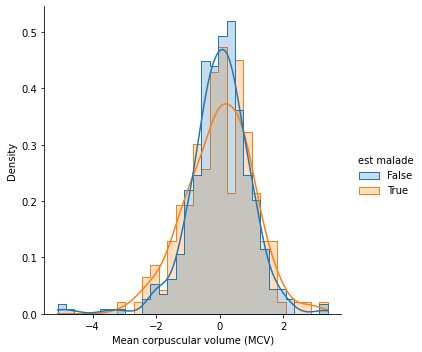

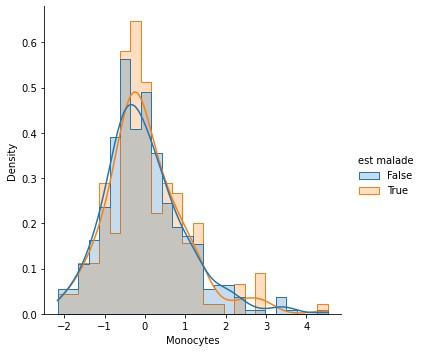

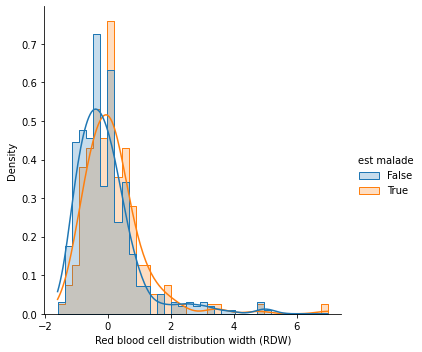

In [225]:
for col in blood_columns:
    sns.displot(df,
                x=col,
                hue='est malade',
                kind='hist',
                kde=True,
                element='step',
                stat='density',
                common_norm=False)

In [228]:
def hostpitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)']:
        return 'surveillance'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)']:
        return 'soins semi-intensifs'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)']:
        return 'soins intensifs'
    else:
        return 'inconnu'

In [230]:
df['statut'] = df.apply(hostpitalisation, axis=1)

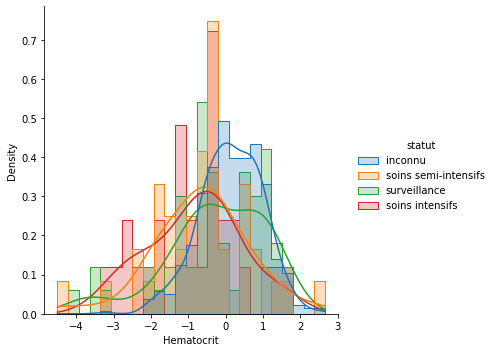

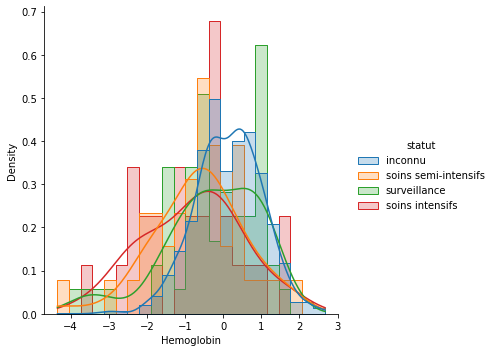

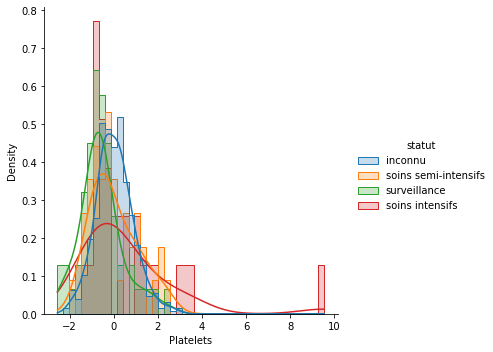

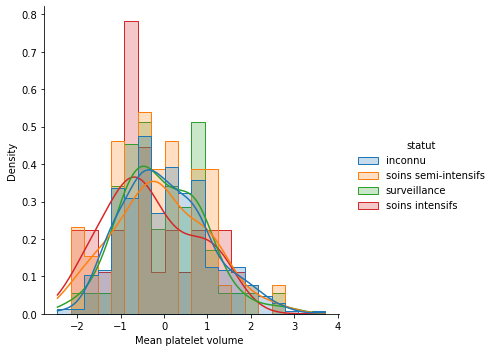

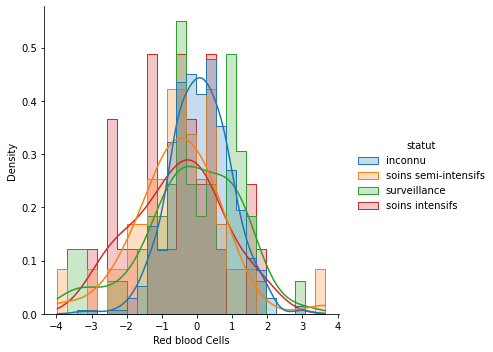

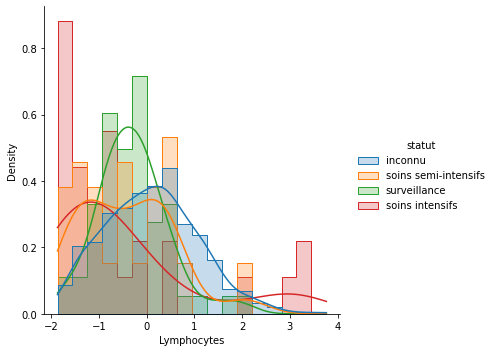

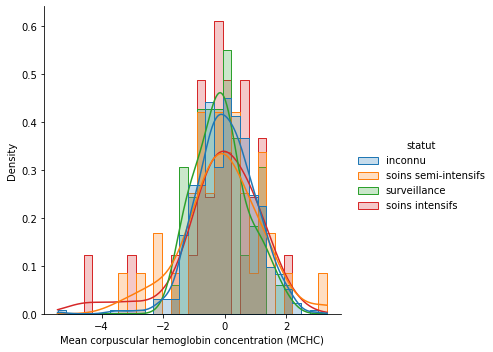

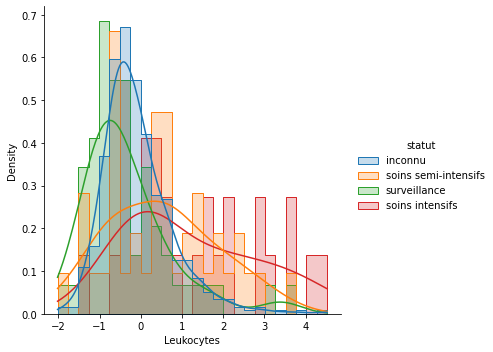

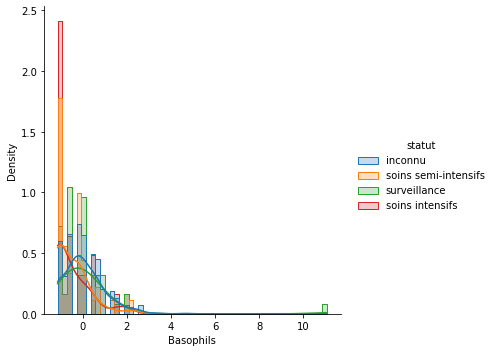

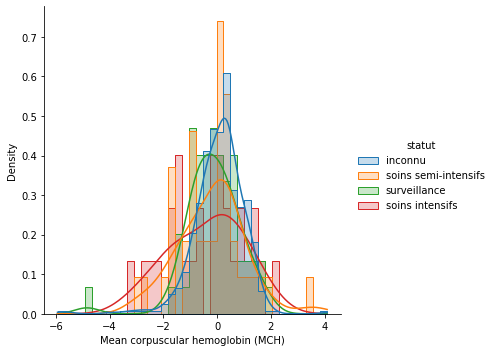

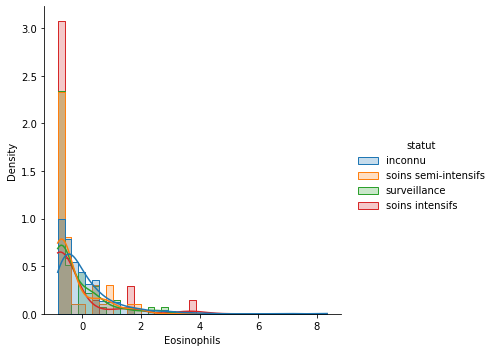

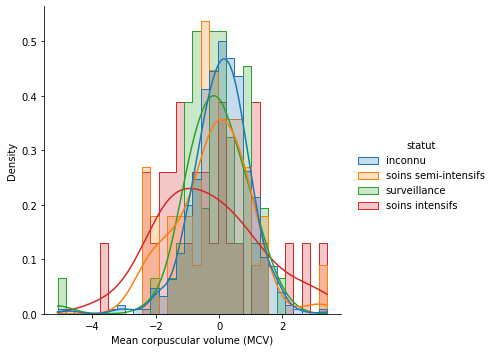

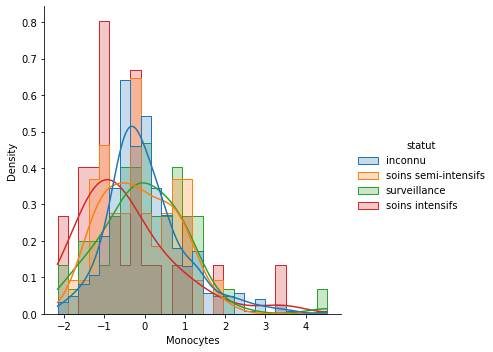

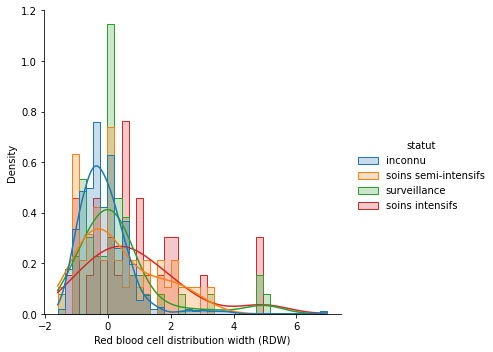

In [243]:
for col in blood_columns:
    sns.displot(df,
                x=col,
                hue='statut',
                kind='hist',
                kde=True,
                element='step',
                stat='density',
                common_norm=False)

In [254]:
df[blood_columns].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [253]:
df[viral_columns].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

In [252]:
df.dropna().count()

Patient age quantile                                     99
SARS-Cov-2 exam result                                   99
Patient addmited to regular ward (1=yes, 0=no)           99
Patient addmited to semi-intensive unit (1=yes, 0=no)    99
Patient addmited to intensive care unit (1=yes, 0=no)    99
Hematocrit                                               99
Hemoglobin                                               99
Platelets                                                99
Mean platelet volume                                     99
Red blood Cells                                          99
Lymphocytes                                              99
Mean corpuscular hemoglobin concentration (MCHC)         99
Leukocytes                                               99
Basophils                                                99
Mean corpuscular hemoglobin (MCH)                        99
Eosinophils                                              99
Mean corpuscular volume (MCV)           

In [268]:
df1 = df[viral_columns[:-2]]
df1['covid'] = df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_16268/3138934887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['covid'] = df['SARS-Cov-2 exam result']


negative    0.91716
positive    0.08284
Name: covid, dtype: float64

In [269]:
df1 = df[blood_columns[:-2]]
df1['covid'] = df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_16268/4246521414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['covid'] = df['SARS-Cov-2 exam result']


negative    0.864775
positive    0.135225
Name: covid, dtype: float64

## T-Test

In [270]:
from scipy.stats import ttest_ind

In [295]:
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(negative_df.sample(positive_df.shape[0])[col].dropna(), positive_df[col].dropna())
    if p < alpha:
        return 'H0 Rejetée'
    else:
        return 0

In [305]:
for col in blood_columns:
    print(f'{col :-<50} {t_test(col)}')

Hematocrit---------------------------------------- 0
Hemoglobin---------------------------------------- 0
Platelets----------------------------------------- H0 Rejetée
Mean platelet volume ----------------------------- H0 Rejetée
Red blood Cells----------------------------------- 0
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- H0 Rejetée
Basophils----------------------------------------- 0
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 Rejetée
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- 0
Red blood cell distribution width (RDW)----------- 0
